<a href="https://colab.research.google.com/github/LUANSSA/MachineLeaning/blob/main/projetoTransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.8755 - loss: 0.3366 - val_accuracy: 0.9660 - val_loss: 0.1050
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 58s 932ms/step - accuracy: 0.9731 - loss: 0.0909 - val_accuracy: 0.9660 - val_loss: 0.0861
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 60s 954ms/step - accuracy: 0.9817 - loss: 0.0678 - val_accuracy: 0.9660 - val_loss: 0.0810
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 60s 949ms/step - accuracy: 0.9852 - loss: 0.0548 - val_accuracy: 0.9690 - val_loss: 0.0750
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 60s 952ms/step - accuracy: 0.9883 - loss: 0.0475 - val_accuracy: 0.9670 - val_loss: 0.0751


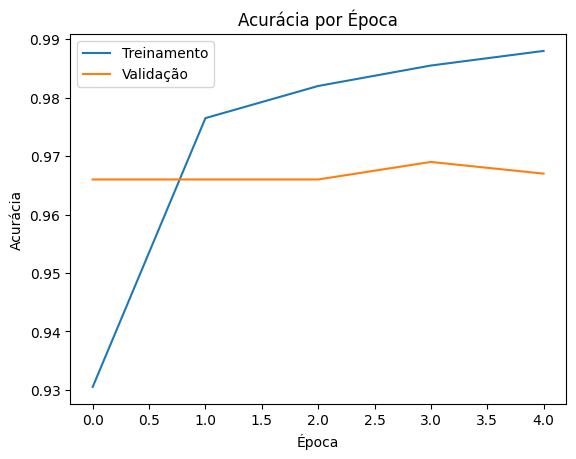

In [ ]:
import tensorflow as tf
import os
import zipfile
import matplotlib.pyplot as plt

# Etapa 1: Baixar e extrair o dataset manualmente
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_path = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=url, extract=False)

extract_dir = os.path.join(os.path.dirname(zip_path), 'cats_and_dogs_filtered')
if not os.path.exists(extract_dir):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(os.path.dirname(zip_path))

# Etapa 2: Caminhos de treino e validação
train_dir = os.path.join(extract_dir, 'train')
val_dir = os.path.join(extract_dir, 'validation')

# Etapa 3: Parâmetros
IMG_SIZE = (160, 160)
BATCH_SIZE = 32

# Etapa 4: Carregar os dados
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# Etapa 5: Normalização
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Etapa 6: Transfer Learning com MobileNetV2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SIZE + (3,),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Etapa 7: Compilar e treinar
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=5)

# Etapa 8: Exibir gráfico de acurácia
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc, label='Treinamento')
plt.plot(val_acc, label='Validação')
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()


In [ ]:
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

# Passo 1: Fazer upload da imagem
uploaded = files.upload()

# Passo 2: Pega o nome da imagem enviada
img_path = list(uploaded.keys())[0]

# Passo 3: Carrega e prepara a imagem
img = load_img(img_path, target_size=(160, 160))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Passo 4: Faz a previsão com o modelo treinado
prediction = model.predict(img_array)

# Passo 5: Interpreta e exibe o resultado
if prediction[0] > 0.5:
    print("É um cachorro 🐶 (confiança: {:.2f}%)".format(prediction[0][0] * 100))
else:
    print("É um gato 🐱 (confiança: {:.2f}%)".format((1 - prediction[0][0]) * 100))

Saving d1.jpg to d1 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
É um cachorro 🐶 (confiança: 93.51%)
